# Limpeza de dados
- Para começar, vamos usar o dataset do Titanic
    - [Titanic](https://www.kaggle.com/competitions/titanic/data)
- Variáveis
    - Survival:	Sobrevivência (0 = Não, 1 = Sim)
    - Pclass: Classe do bilhete	(1 = 1º, 2 = 2º, 3 = 3º)
    - Sex: Gênero	
    - Age: Idade em anos	
    - Sibsp: Nº de irmãos/cônjuges a bordo do Titanic	
    - Parch: Nº de pais/filhos a bordo do Titanic		
    - Ticket: Número do bilhete		
    - Fare:	Tarifa do passageiro	
    - Cabin: Número da cabine	
    - Embarked:	Porto de embarcação	(C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando a base do titanic
titanic = pd.read_csv('train.csv')

In [3]:
# Visualizando a base
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# E seu formato 
titanic.shape

(891, 12)

In [5]:
# info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Contando valores nulos
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Describe
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Cardinalidade
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Podemos começar verificando os valores vazios**

In [9]:
# Valores vazios
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Começando com o embarque**

In [10]:
# Verificando os registros com embarque vazio
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
# Atualizando o valor para as 2 linhas
titanic.loc[titanic.Embarked.isnull(),'Embarked'] = 'S'

- **Analisando a idade**

In [12]:
# Verificando valores nulos na idade
titanic[titanic.Age.isnull()].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [13]:
# Podemos verificar o describe para a idade
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

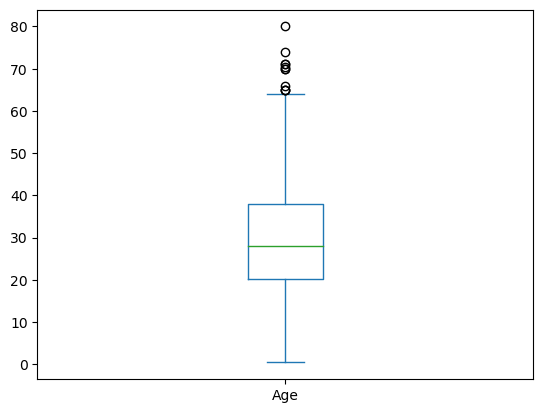

In [14]:
# E podemos visualizar isso graficamente no boxplot
titanic.Age.plot.box();

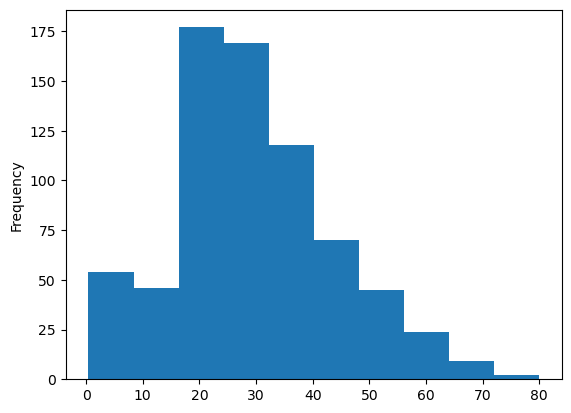

In [15]:
# Ou no histograma
titanic.Age.plot.hist();

In [16]:
# Uma opção é usar a mediana, ou a média das idades
titanic.Age.median()

28.0

In [17]:
# Ou podemos, por exemplo, tirar a média de idade por alguns grupos como o Pclass
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [18]:
# Podemos adicionar o gênero
titanic.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

- Podemos utilizar o título nos nomes para tentar estimar as idades faltantes

In [19]:
# E se considerarmos os títulos nos nomes?
titanic.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [20]:
# E se pegarmos a posição da vírgula?
titanic.Name.str.find(',')

0      6
1      7
2      9
3      8
4      5
      ..
886    8
887    6
888    8
889    4
890    6
Name: Name, Length: 891, dtype: int64

In [21]:
# E a posição do ponto?
titanic.Name.str.find('.')

0      10
1      12
2      15
3      13
4       9
       ..
886    13
887    12
888    14
889     8
890    10
Name: Name, Length: 891, dtype: int64

In [22]:
# Podemos pegar o texto entre essas posições
titanic.Name[1][7+2:12]

'Mrs'

In [23]:
# Criando uma função para buscar o título em cada nome
def extrai_titulo(texto):
    titulo = texto[texto.find(',')+2:texto.find('.')]
    
    if titulo in ['Mr','Mrs','Miss','Master']:
        return titulo
    else:
        return 'Outros'

In [24]:
# Usando essa função na base
titanic['Titulos'] = titanic.Name.apply(extrai_titulo)

In [25]:
# Visualizando a base
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulos
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [26]:
# Contando a quantidade de registros em cada título
titanic.Titulos.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Outros     27
Name: Titulos, dtype: int64

- "O que significa mestre? Mestre é um título para um homem menor de idade. Se uma pessoa tiver menos de 18 anos, o mestre seria usado. Uma vez que uma pessoa completa 18 anos e entra na idade adulta, o senhor seria usado." 

In [27]:
# Utilizando o título no groupby
titanic.groupby(['Pclass','Sex','Titulos'])['Age'].mean()

Pclass  Sex     Titulos
1       female  Miss       30.000000
                Mrs        40.882353
                Outros     33.666667
        male    Master      5.306667
                Mr         41.580460
                Outros     48.727273
2       female  Miss       22.390625
                Mrs        33.682927
                Outros     28.000000
        male    Master      2.258889
                Mr         32.768293
                Outros     42.000000
3       female  Miss       16.123188
                Mrs        33.515152
        male    Master      5.350833
                Mr         28.724891
Name: Age, dtype: float64

- Para criar uma nova coluna com esses valores, podemos utilizar o [transform](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html) do pandas

In [28]:
# Criando uma nova coluna das idades
titanic['Age1'] = titanic.groupby(['Pclass','Sex','Titulos'])['Age'].transform('mean')

In [29]:
# Visualizando a base
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulos,Age1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,28.724891
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,40.882353
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,16.123188


In [30]:
# Podemos diretamente utilizar esse valor no fillna
titanic['Age2'] = titanic.Age.fillna(titanic.groupby(['Pclass','Sex','Titulos'])['Age'].transform('mean'))

In [31]:
# Visualizando novamente a base
titanic[titanic.Age.isnull()].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulos,Age1,Age2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,28.724891,28.724891
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr,32.768293,32.768293
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs,33.515152,33.515152


In [32]:
# Podemos então usar esse valor na idade
titanic['Age'] = titanic.Age.fillna(titanic.groupby(['Pclass','Sex','Titulos'])['Age'].transform('mean'))

In [33]:
# E apagar essas duas colunas
titanic = titanic.drop(['Age1','Age2'],axis=1)

In [34]:
# Verificando novamente valores nulos
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Titulos          0
dtype: int64

- **Então analisando a cabine**

In [35]:
# Verificando as informações em cabine
titanic.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [36]:
# Eliminando essa coluna
titanic = titanic.drop('Cabin',axis=1)

**Verificando a existência de outliers**

In [37]:
# Utilizando o describe
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.430535,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.551396,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.724891,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.750000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- **Será que realmente teve uma taxa de 512?**

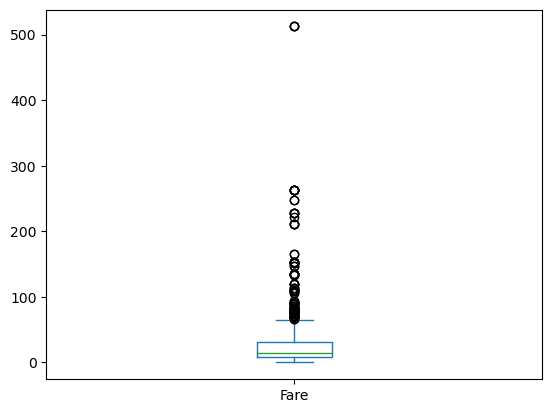

In [38]:
# Verificando o boxplot da taxa
titanic.Fare.plot.box();

In [39]:
# Filtando esse valor
titanic[titanic.Fare == titanic.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulos
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Miss
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Mr
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Mr


- Mesmo que o outlier esteja correto, precisamos analisar se faz sentido para o modelo
    - Esse valor faz sentido com os valores de passagem?
    - Ele pode ocorrer novamente?
    - Etc

**Analisando a base final**

In [40]:
# Base
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Titulos      891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
# Voltando na cardinalidade
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             97
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
Titulos          5
dtype: int64

- Agora que já retiramos a informação útil do nome, podemos eliminar essa coluna

In [42]:
# Retirando a coluna Name
titanic = titanic.drop('Name',axis=1)

- Também podemos eliminar as informações que não podem ajudar na identificação do passageiro que irá ou não sobreviver

In [43]:
# Retirando as colunas PassengerId e Ticket
titanic = titanic.drop(['PassengerId','Ticket'],axis=1)

In [44]:
# Visualizando nossa base final
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titulos
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss


In [45]:
# Visualizando as informações
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Titulos   891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


- **Exportando essa base para um novo csv**

In [47]:
# Exportando o arquivo
titanic.to_csv('train2.csv',index=False)